# Trabalho Prático 1 - Classificação de Exoplanetas
Aluno: Daniel Ferreira Abadi<br>
Matrícula: 2018088062


O objetivo deste trabalho prático é aplicar os conceitos vistos na disciplina e desenvolver novos conhecimentos, visto que nem todos os algoritmos foram estudados. Para o cumprimento deste objetivo, foi nos passada a tarefa de utilizar e comparar, por experimentos, algoritmos de aprendizado de máquina no problema de classificação binária de candidatos a exoplanetas.

Na célula abaixo temos todas as importações de bibliotecas que foram utilizadas neste trabalho, além da semente aleatória utilizada. Há, também, a importação dos dados a serem utilizados no experimento. As bibliotecas Numpy e Pandas foram utilizadas para manipular os dados, enquanto a Matplotlib tem como papel a visualização de algumas métricas.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import tree
from sklearn import svm

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


np.random.seed(42)

df_koi = pd.read_csv('koi_data.csv')
df_koi.head()

,kepoi_name,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,K00752.01,CONFIRMED,9.48804,0.146,2.95750,615.8,0.02234,3.20796,2.26,0.0853,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,K00752.02,CONFIRMED,54.41838,0.586,4.50700,874.8,0.02795,3.02368,2.83,0.2734,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,K00754.01,FALSE POSITIVE,1.73695,1.276,2.40641,8079.2,0.38739,0.22080,33.46,0.0267,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
3,K00755.01,CONFIRMED,2.52559,0.701,1.65450,603.3,0.02406,1.98635,2.75,0.0374,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070
4,K00114.01,FALSE POSITIVE,7.36179,1.169,5.02200,233.7,0.18339,0.00485,39.21,0.0820,...,-13.450,24.090,0.00303,-0.00555,-4.506,7.710,8.930,-4.537,7.713,8.948


# Tratamento dos dados
Os dados foram tratados de forma a possibilitar seu uso nos algoritmos de classificação. Primeiramente, a coluna de nomes foi excluída, uma vez que esta não poderia ser passada para os algoritmos em questão. O conjunto de dados também foi separado em dois, o conjunto X, que possui os valores numéricos (features), e o conjunto y, que possui a informação se o candidato é ou não um exoplaneta.

Para que o vetor Y pudesse ser utilizado, foi necessário transformar seus campos em 0 ou 1. Durante os experimentos, foi percebido que o conjunto X não estava em sua melhor forma para ser utilizado, portanto foi percebida a necessidade de normalizá-lo. Tendo todos os preparativos feitos, os dois conjuntos foram divididos em treino e teste, com 25% dos dados destinados a testes.

In [20]:
# Removendo a coluna de nomes
df_koi_drop_name = df_koi.drop(labels='kepoi_name', axis=1)

# Separando X e y
y = df_koi.iloc[:,1:2]
X = df_koi.iloc[:,2:]

# Transformando os valores categóricos em 0 ou 1
enc = preprocessing.OrdinalEncoder()
y = enc.fit_transform(y)

# Normalização do X
scaler = preprocessing.StandardScaler().fit(X) # normalizando o X
X = scaler.transform(X)

# Particionando os dados em treino e teste e embaralhando as linhas
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.25)

A função abaixo foi feita simplesmente com o intuito de apresentar os resultados obtidos.

In [21]:
# Função de plot
def plot_charts(x_axis, y_axis, x_label, title):
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.set_ylim([0.7, 1])
    ax.set_ylabel("Acurácia")
    ax.set_xlabel(x_label)
    colors = ["green" if y ==  max(y_axis) else "gray" for y in y_axis]
    ax.bar(x_axis, y_axis, color=colors)
    ax.grid(True, axis='y', color="gray")
    plt.plot()

# Classificadores
Antes de introduzirmos os experimentos, vamos explicar como eles foram feitos. A avaliação de cada algoritmo foi feita utilizando a validação cruzada 5-fold, juntamente com a variação dos hiperparâmetros pedidos. Para isso, foi utilizada função a GridSearchCV, com "scoring" sendo medido em acurácia, e os resultados de cada hiperparâmetro sendo a média dos k-folds. Todo método possui uma visualização contendo as acurácias médias de cada hiperparâmetro, e uma sinalização de qual foi o melhor.

## Naive Bayes

In [22]:
gnb = GaussianNB()
gnb_searcher = GridSearchCV(gnb, {}, scoring="accuracy", verbose=3, n_jobs=1, cv=5)
gnb_searcher.fit(X_train, y_train[:,0])

print(f"Acurácia = {gnb_searcher.cv_results_['mean_test_score'][0]}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................................., score=0.912 total time=   0.0s
[CV 2/5] END ..................................., score=0.926 total time=   0.0s
[CV 3/5] END ..................................., score=0.928 total time=   0.0s
[CV 4/5] END ..................................., score=0.919 total time=   0.0s
[CV 5/5] END ..................................., score=0.919 total time=   0.0s
Acurácia = 0.9207918841721658


O Naive Bayes foi utilizado apenas como uma base para o experimento, mas mostrou uma boa acurácia, elevando o resultado esperado dos demais algoritmos de classificação.

## Decision Tree

Fitting 5 folds for each of 11 candidates, totalling 55 fits
Resultados:
Melhor acurária = 0.951294527069175
Melhor parâmetro = max_depth: 5



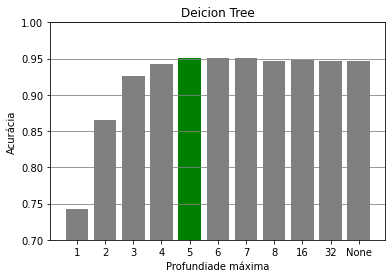

In [23]:
dicision_tree = tree.DecisionTreeClassifier()
# conjunto contendo o tamanho de cada árvore
tree_depths = {"max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 16, 32, None]}
tree_searcher = GridSearchCV(dicision_tree, tree_depths, scoring="accuracy", verbose=3, n_jobs=-1, cv=5)
tree_searcher.fit(X_train, y_train[:,0])

print(f"Resultados:")
print(f"Melhor acurária = {tree_searcher.best_score_}")
print(f"Melhor parâmetro = {', '.join('{}: {}'.format(k, v) for k, v in tree_searcher.best_params_.items())}\n")
plot_charts(['1', '2', '3', '4', '5', '6', '7', '8', '16', '32', 'None'], tree_searcher.cv_results_["mean_test_score"], 'Profundiade máxima', 'Deicion Tree')

No algoritmo de Árvore de Decisão, o parâmetro avaliado é a altura máxima que a árvore pode atingir. Podemos observar que, para valores mais baixos, como 1 e 2, a acurácia foi muito baixa, indicando uma possível falta de capacidade e um erro de viés maior. A partir da altura 5, é possível notar que todas possuem acurácias bem próximas. Já com alturas máximas maiores, é possível notar uma diminuição da acurácia, podendo indicar um possível sobreajuste nos dados, aumentando o erro de variância.

## SVM

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Resultados:
Melhor acurária = 0.9515502807052103
Melhor parâmetro = kernel: linear



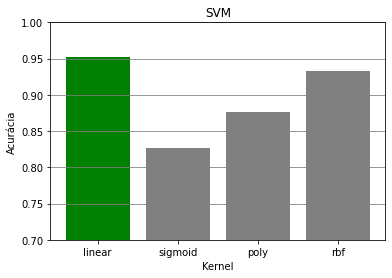

In [24]:
svm_classifier = svm.SVC(probability=True)
# conjunto contendo os kernels
svm_kernels = {"kernel": ["linear", "sigmoid", "poly", "rbf"]}
svm_searcher = GridSearchCV(svm_classifier, svm_kernels, scoring="accuracy", verbose=3, n_jobs=-1, cv=5)
svm_searcher.fit(X_train, y_train[:,0])

print(f"Resultados:")
print(f"Melhor acurária = {svm_searcher.best_score_}")
print(f"Melhor parâmetro = {', '.join('{}: {}'.format(k, v) for k, v in svm_searcher.best_params_.items())}\n")
plot_charts(svm_kernels['kernel'], svm_searcher.cv_results_["mean_test_score"], 'Kernel', 'SVM')

No SVM, o objetivo era testá-lo utilizando diferentes kernels, que dão capacidade para o modelo. Kernels mais simples adicionam menos capacidade ao modelo, enquanto kernels com funções mais complexas podem adicionar muita capacidade. O objetivo é então comparar qual kernel é o mais apropriado aos dados. Conforme vemos no gráfico acima, o kernel linear foi a melhor opção, uma possível explicação é que os dados não precisam de muita capacidade para serem classificados corretamente.

## k-NN

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Resultados:
Melhor acurária = 0.8882373026034998
Melhor parâmetro = n_neighbors: 3



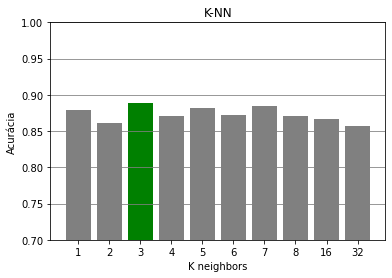

In [25]:
knn_classifier = KNeighborsClassifier()
# conjunto contendo a quantidade de vizinhos utilizados
num_neighbors = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 16, 32]}
knn_searcher = GridSearchCV(knn_classifier, num_neighbors, scoring="accuracy", verbose=3, n_jobs=-1, cv=5)
knn_searcher.fit(X_train, y_train[:,0])

print(f"Resultados:")
print(f"Melhor acurária = {knn_searcher.best_score_}")
print(f"Melhor parâmetro = {', '.join('{}: {}'.format(k, v) for k, v in knn_searcher.best_params_.items())}\n")
plot_charts(['1', '2', '3', '4', '5', '6', '7', '8', '16', '32'], knn_searcher.cv_results_["mean_test_score"], 'K neighbors', 'K-NN')

O classificador K-NN classifica um ponto de acordo com seus k vizinhos mais próximos. Escolhendo poucos vizinhos, ficamos reféns do ruído oferecido pelos dados, podendo ter um erro de variância maior. Já para valores maiores, estamos menos suscetíveis a erros de variância, mas há o risco de generalizarmos muito, a ponto de não conseguirmos classificar corretamente. Tendo isso em vista, o algoritmo não se encaixou bem aos dados, fornecendo acurácias menores do que os outros algoritmos implementados.

## Random Forest

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Resultados:
Melhor acurária = 0.9677021569979317
Melhor parâmetro = n_estimators: 32



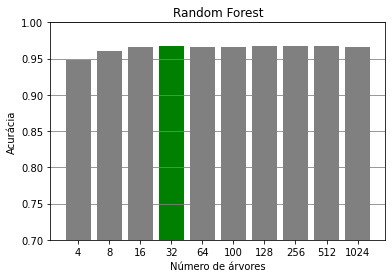

In [26]:
forest_classifier = RandomForestClassifier()
# conjunto contendo o número de árvores utilizadas
num_estimators = {"n_estimators": [4, 8, 16, 32, 64, 100, 128, 256, 512, 1024]}
forest_searcher = GridSearchCV(forest_classifier, num_estimators, scoring="accuracy", verbose=3, n_jobs=-1, cv=5)
forest_searcher.fit(X_train, y_train[:,0])

print(f"Resultados:")
print(f"Melhor acurária = {forest_searcher.best_score_}")
print(f"Melhor parâmetro = {', '.join('{}: {}'.format(k, v) for k, v in forest_searcher.best_params_.items())}\n")
plot_charts(['4', '8', '16', '32', '64', '100', '128', '256', '512', '1024'], forest_searcher.cv_results_["mean_test_score"], 'Número de árvores', 'Random Forest')

O classificador Random Forest utiliza N árvores de decisão para a classificação, que é feita levando em conta o resultado da maioria das árvores. Como não foi passado nenhum outro parâmetro a ser utilizado, os outros foram deixados como padrão. Isso nos leva a ter árvores com tamanhos máximos indefinidos. Tendo isso em vista, com o aumento do número de árvores, conseguimos diminuir o erro de viés, já que as árvores são diferentes umas das outras. Mas um número muito grande de árvores pode aumentar o erro de variância, já que cada árvore vai ser treinada em um conjunto separado de treino, e quanto menor esse conjunto, mais propenso a essas árvores realizarem sobre ajuste. Portanto, um número menor de árvores pode minimizar o erro de viés e um número muito alto pode aumentar o erro de variância.

## Gradient Tree Boosting

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Resultados:
Melhor acurária = 0.9730857874519847
Melhor parâmetro = n_estimators: 2048



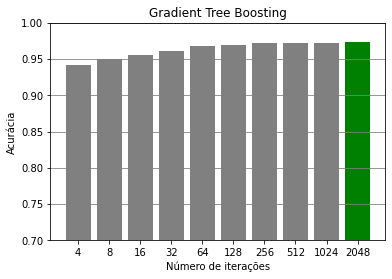

In [27]:
boost_classifier = GradientBoostingClassifier()
num_iterations = {"n_estimators": [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]}
boost_searcher = GridSearchCV(boost_classifier, num_iterations, scoring="accuracy", verbose=3, n_jobs=-1, cv=5)
boost_searcher.fit(X_train, y_train[:,0])

print(f"Resultados:")
print(f"Melhor acurária = {boost_searcher.best_score_}")
print(f"Melhor parâmetro = {', '.join('{}: {}'.format(k, v) for k, v in boost_searcher.best_params_.items())}\n")
plot_charts(['4', '8', '16', '32', '64', '128', '256', '512', '1024', '2048'], boost_searcher.cv_results_["mean_test_score"], 'Número de iterações', 'Gradient Tree Boosting')

Assim como no Random Forest, o Gradient Tree Boosting utiliza N árvores de decisão, com a diferença que as árvores são treinadas em cima do erro das árvores anteriores. E como não foi passado nenhum outro parâmetro a ser modificado, todos foram deixados como padrão. Diferente do Random Forest, adicionar muitas árvores aqui pode gerar sobre ajuste, visto que muitas árvores são usadas como "weak learners". Mesmo com esse comentário, a acurácia se mostrou melhor com um maior número de árvores.



# Comparações entre os métodos

Para a comparação das performances dos métodos, foi requisitado que fosse em termos de métricas como a curva ROC, a precisão e a revocação. Para realizar esta comparação, foi utilizado o conjunto de dados de teste, que foi previamente separado no início deste notebook. Para isso, usamos a predição probabilística de cada método, em específico os que obtiveram melhores resultados, a partir do conjunto de testes.

Método:  Naive Bayes
Melhor Acurácia:  0.9207918841721658
Precisão:  0.8205493284428503  - Revocação:  0.9667795815507241
-----------------------------
Método:  Dicision Tree
Melhor Acurácia:  0.951294527069175
Precisão:  0.9303355951378572  - Revocação:  0.8400504572690004
-----------------------------
Método:  SVM
Melhor Acurácia:  0.9515502807052103
Precisão:  0.899969992596882  - Revocação:  0.8056166370189387
-----------------------------
Método:  KNN
Melhor Acurácia:  0.8882373026034998
Precisão:  0.8793729237840843  - Revocação:  0.7101986754966887
-----------------------------
Método:  Random Forest
Melhor Acurácia:  0.9677021569979317
Precisão:  0.9399308776511702  - Revocação:  0.9086871834826646
-----------------------------
Método:  Gradient Boosting
Melhor Acurácia:  0.9730857874519847
Precisão:  0.936251836235186  - Revocação:  0.6880284320071703
-----------------------------


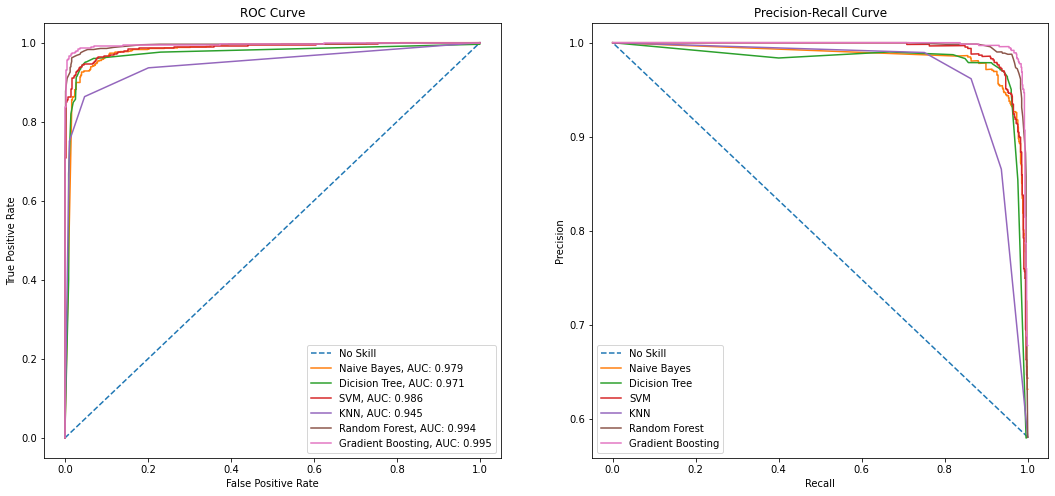

In [28]:
labels = ['Naive Bayes', 'Dicision Tree', 'SVM', 'KNN','Random Forest', 'Gradient Boosting']
algoritmos = [gnb_searcher, tree_searcher, svm_searcher, knn_searcher, forest_searcher, boost_searcher]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,8))

ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
ax1.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
precision, recall, thresholds = precision_recall_curve(y_test, ns_probs)
ax2.plot(recall, precision, linestyle='--', label='No Skill')

for algoritmo, label in zip(algoritmos, labels):
    probs = algoritmo.predict_proba(X_test)
    lr_probs = probs[:, 1]
    lr_auc = roc_auc_score(y_test, lr_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

    precision, recall, thresholds = precision_recall_curve(y_test, lr_probs)
    ax2.plot(recall, precision, label=label)
    ax1.plot(lr_fpr, lr_tpr, label=label+", AUC: %0.3f" % lr_auc)

    print("Método: ", label)
    print("Melhor Acurácia: ", algoritmo.best_score_)
    print("Precisão: ", precision.mean(), " - Revocação: ", recall.mean())
    print("-----------------------------")

ax1.set_title('ROC Curve')
ax1.set_ylabel('True Positive Rate')
ax1.set_xlabel('False Positive Rate')
ax1.legend()

ax2.set_title('Precision-Recall Curve')
ax2.set_ylabel('Precision')
ax2.set_xlabel('Recall')
ax2.legend()
plt.show()

Podemos ver que os algoritmos Random Forest e Gradient Tree Boosting obtiveram as maiores áreas abaixo de suas respectivas curvas, refletindo bem seus bons resultados nos experimentos realizados. O algoritmo K-NN, por sua vez, teve a menor área, visto que apresentou os menores valores médios de acurácia obtidos.

# Conclusão
Em resumo, métodos baseados em ensembles tiveram uma performance melhor do que os demais, em especial o algoritmo Gradient Tree Boosting, que dominou totalmente todos os outros algoritmos abordados. Em contrapartida, o algoritmo K-NN foi o que obteve piores resultados, mostrando que os dados não se encaixaram bem a este modelo.